In [2]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
actions = [
    'Question',
    'Can''t listen',
    'Cant''t watch'
]

data = np.concatenate([
    np.load('dataset/seq_Question_1658756116.npy'),
    np.load('dataset/seq_Cant listen_1658756116.npy'),
    np.load('dataset/seq_Cant watch_1658756116.npy')
], axis=0)

data.shape

(2437, 30, 100)

In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2437, 30, 99)
(2437,)


In [5]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2437, 3)

In [6]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2193, 30, 99) (2193, 3)
(244, 30, 99) (244, 3)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
66/69 [===========================>..] - ETA: 0s - loss: 8.1835 - acc: 0.6387
Epoch 1: val_acc improved from -inf to 0.84016, saving model to models\model.h5
69/69 [==============================] - 4s 28ms/step - loss: 7.9543 - acc: 0.6452 - val_loss: 1.7343 - val_acc: 0.8402 - lr: 0.0010
Epoch 2/200
66/69 [===========================>..] - ETA: 0s - loss: 1.4705 - acc: 0.8887
Epoch 2: val_acc improved from 0.84016 to 0.93033, saving model to models\model.h5
69/69 [==============================] - 1s 18ms/step - loss: 1.5098 - acc: 0.8892 - val_loss: 0.8811 - val_acc: 0.9303 - lr: 0.0010
Epoch 3/200
66/69 [===========================>..] - ETA: 0s - loss: 0.3687 - acc: 0.9522
Epoch 3: val_acc improved from 0.93033 to 0.96721, saving model to models\model.h5
69/69 [==============================] - 1s 18ms/step - loss: 0.3585 - acc: 0.9526 - val_loss: 0.1079 - val_acc: 0.9672 - lr: 0.0010
Epoch 4/200
68/69 [============================>.] - ETA: 0s - loss: 0.1642 - acc: 0.

69/69 [==============================] - ETA: 0s - loss: 2.9105e-04 - acc: 1.0000
Epoch 30: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 17ms/step - loss: 2.9105e-04 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000 - lr: 0.0010
Epoch 31/200
67/69 [============================>.] - ETA: 0s - loss: 2.7330e-04 - acc: 1.0000
Epoch 31: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 19ms/step - loss: 2.7087e-04 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000 - lr: 0.0010
Epoch 32/200
68/69 [============================>.] - ETA: 0s - loss: 2.5913e-04 - acc: 1.0000
Epoch 32: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 17ms/step - loss: 2.5839e-04 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000 - lr: 0.0010
Epoch 33/200
67/69 [============================>.] - ETA: 0s - loss: 2.3229e-04 - acc: 1.0000
Epoch 33: val_acc did not improve from 1.00000
69/69 [===========================

69/69 [==============================] - 1s 17ms/step - loss: 6.1249e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9959 - lr: 0.0010
Epoch 60/200
69/69 [==============================] - ETA: 0s - loss: 5.7939e-05 - acc: 1.0000
Epoch 60: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 16ms/step - loss: 5.7939e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9959 - lr: 0.0010
Epoch 61/200
67/69 [============================>.] - ETA: 0s - loss: 5.6624e-05 - acc: 1.0000
Epoch 61: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 17ms/step - loss: 5.5583e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9959 - lr: 0.0010
Epoch 62/200
67/69 [============================>.] - ETA: 0s - loss: 5.4069e-05 - acc: 1.0000
Epoch 62: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 18ms/step - loss: 5.3031e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 0.9959 - lr: 0.0010
Epoch 63/200
69/69 [======

69/69 [==============================] - ETA: 0s - loss: 0.0171 - acc: 0.9954
Epoch 89: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 18ms/step - loss: 0.0171 - acc: 0.9954 - val_loss: 0.0486 - val_acc: 0.9877 - lr: 5.0000e-04
Epoch 90/200
68/69 [============================>.] - ETA: 0s - loss: 0.0156 - acc: 0.9968
Epoch 90: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 18ms/step - loss: 0.0155 - acc: 0.9968 - val_loss: 0.0504 - val_acc: 0.9918 - lr: 5.0000e-04
Epoch 91/200
68/69 [============================>.] - ETA: 0s - loss: 0.0148 - acc: 0.9972
Epoch 91: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 17ms/step - loss: 0.0147 - acc: 0.9973 - val_loss: 0.0537 - val_acc: 0.9918 - lr: 5.0000e-04
Epoch 92/200
68/69 [============================>.] - ETA: 0s - loss: 0.0134 - acc: 0.9968
Epoch 92: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 17ms/s

Epoch 119/200
69/69 [==============================] - ETA: 0s - loss: 0.0020 - acc: 0.9995
Epoch 119: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 16ms/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0089 - val_acc: 0.9959 - lr: 5.0000e-04
Epoch 120/200
69/69 [==============================] - ETA: 0s - loss: 0.0019 - acc: 0.9995
Epoch 120: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 16ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0086 - val_acc: 0.9959 - lr: 5.0000e-04
Epoch 121/200
69/69 [==============================] - ETA: 0s - loss: 0.0018 - acc: 1.0000
Epoch 121: val_acc did not improve from 1.00000

Epoch 121: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
69/69 [==============================] - 1s 16ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 0.9959 - lr: 5.0000e-04
Epoch 122/200
68/69 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.999

69/69 [==============================] - ETA: 0s - loss: 8.9629e-04 - acc: 1.0000
Epoch 148: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 17ms/step - loss: 8.9629e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9959 - lr: 2.5000e-04
Epoch 149/200
69/69 [==============================] - ETA: 0s - loss: 8.7559e-04 - acc: 1.0000
Epoch 149: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 17ms/step - loss: 8.7559e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9959 - lr: 2.5000e-04
Epoch 150/200
69/69 [==============================] - ETA: 0s - loss: 8.5763e-04 - acc: 1.0000
Epoch 150: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 17ms/step - loss: 8.5763e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9959 - lr: 2.5000e-04
Epoch 151/200
69/69 [==============================] - ETA: 0s - loss: 8.1979e-04 - acc: 1.0000
Epoch 151: val_acc did not improve from 1.00000
69/69 [========

Epoch 177/200
68/69 [============================>.] - ETA: 0s - loss: 4.2756e-04 - acc: 1.0000
Epoch 177: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 19ms/step - loss: 4.2429e-04 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 0.9959 - lr: 1.2500e-04
Epoch 178/200
66/69 [===========================>..] - ETA: 0s - loss: 3.7794e-04 - acc: 1.0000
Epoch 178: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 19ms/step - loss: 4.1641e-04 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 0.9959 - lr: 1.2500e-04
Epoch 179/200
66/69 [===========================>..] - ETA: 0s - loss: 4.1381e-04 - acc: 1.0000
Epoch 179: val_acc did not improve from 1.00000
69/69 [==============================] - 1s 17ms/step - loss: 4.1115e-04 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9959 - lr: 1.2500e-04
Epoch 180/200
68/69 [============================>.] - ETA: 0s - loss: 4.1771e-04 - acc: 1.0000
Epoch 180: val_acc did not improve from 1.00000
6

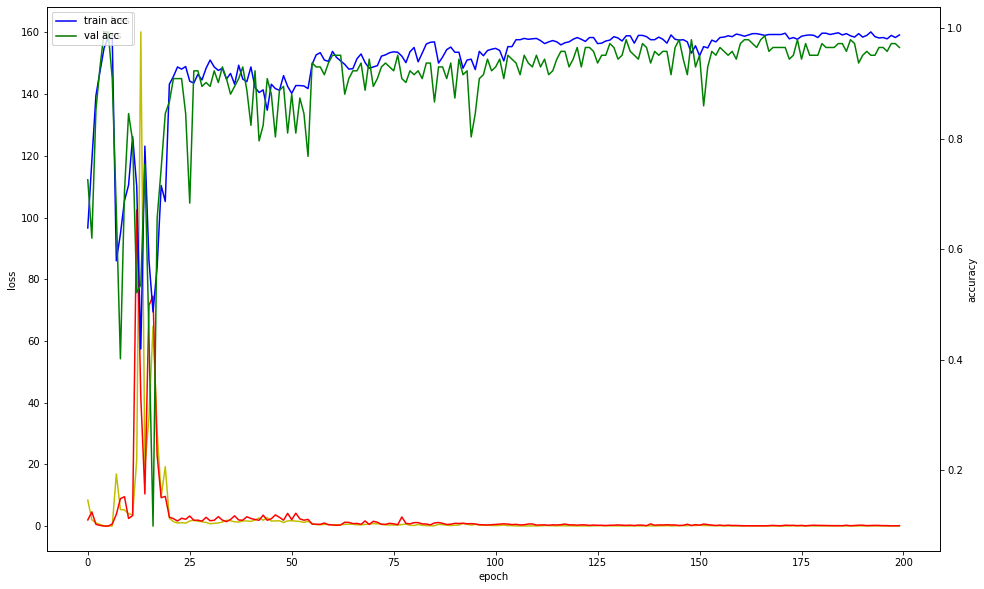

In [9]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

5/5 [==============================] - 0s 7ms/step


array([[[115,   0],
        [  0,  27]],

       [[ 94,   1],
        [  0,  47]],

       [[ 74,   0],
        [  1,  67]]], dtype=int64)